<a href="https://colab.research.google.com/github/anathnath/schrodinger/blob/master/CBCS_SEM_VH_QuantumMechanicsPartII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## $\color{green}{ Quantum ~Mechanics~ Python}$
## $ \color{orange}{Dr. ~Anathnath ~Ghosh}$
## $ \color{blue}{Dum~ Dum ~Motijheel ~College}$

## I am not an expert in coding pyrthon
## I am just a novice in this line
## My all learning is from attending the workshops of
## Prof. Abhijit Kargupta and Prof. Arunava Adhikary
## This coding has been done keeping in mind
## the need of the beginners  students
## Any body can use it modify it and share it
## to anybody who needs it.



# Infinite Potential well by Different methods:

![alt text](https://chem.libretexts.org/@api/deki/files/349193/download.png?revision=1&size=bestfit&width=740&height=556)

![alt text](https://github.com/timothypholmes/Infinite-square-well-Schrodinger-equation/blob/master/time_dependent_3000.gif?raw=true)

In [ ]:
# Import the required modules
# Numerical Integration 
# Date 19/02/2021
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Load interactive widgets
import ipywidgets as widgets
# This makes the plots appear inside the notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
@widgets.interact(E=(8,50))  # Energy between 8 and 50
def plot(E):
    def dU_dx(U,x,E):
        y,z=U
        f1,f2=z,(V-E)*y
        # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
        return [f1,f2]
    V=0
    U0 = np.array([0, .001])
    xs = np.linspace(0, 1, 100)
    Us = odeint(dU_dx, U0, xs,args=(E,))
    Us1 = odeint(dU_dx, U0, xs,args=(9.7,))
    ys = Us[:,0]
    ys1 = Us1[:,0]
    plt.figure(figsize=(12,6))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Infinite Well Potential")
    plt.plot(xs,ys,label='Energy Variable')
    plt.plot(xs,ys1,label='E=9.7')
    plt.legend()
    plt.show()


In [ ]:
# Code help from  Dr. Avijit Kargupta
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import bisect
import matplotlib.pyplot as plt
def f(u,x,E):
  y,z=u
  f1,f2=z,(V-E)*y
  return [f1,f2]
def shoot(E):
  sol=odeint(f,u,x,args=(E,))
  return sol[:,0][-1]
V=0
energies=np.arange(0,100,.2)
x=np.linspace(0,1,2021)
u=[0,.001]
Eigen=[shoot(E) for E in energies]
sol=odeint(f,u,x,args=(9.7,))
sol1=odeint(f,u,x,args=(39.7,))
#plt.plot(energies,Eigen)
plt.figure(figsize=(12,6))
plt.plot(x,sol[:,1],x,sol1[:,1])


In [ ]:
# Infinite square well matrix diagonalization
# Finite difference Method
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
plt.style.use('bmh')
hbar=1
m=1
N = 512
a = 1.0
x = np.linspace(-a/2.,a/2.,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
V = 0.*x
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can be accessed as psi[n]



In [ ]:
plt.figure(figsize=(10,7))
for i in range(2):
    if psi[i][N-10] < 0:   # Flip the wavefunctions if it is negative at large x, so plots are more consistent.
        plt.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
    else:
        plt.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
    plt.title("Solutions to the Infinite Square Well")
plt.legend()
plt.savefig("Infinite_Square_Well_WaveFunctions.pdf")
plt.show()


In [ ]:
# Theoretical and Numerical energy eigenvalues
for i in range(7):
    n = i+1
    print("E[{}] = {:9.4f}, E_{} ={:9.4f}".format(n,E[i],n, n*n*np.pi**2*hbar*hbar/(2*m*a*a)))

In [ ]:
# Accuracy check very good accuracy
# Fulfils orthogonality conditions
for j in range(5):
    for i in range(5):
        print("{:16.9e}".format(np.sum(psi[j]*psi[i])))
   

In [ ]:
# This programme is done based on book
# By Dr. Pradipta Kumar Mandal
# In Finite Well potential
# Simpson 1/3 rule for discrete function
# Simpson 1/3 rule for discrete function
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
def simp13dis(h,fx):
  n=len(fx)
  I=0
  for i in range(n):
    if i==0 or i==n:
      I+=fx[i]
    elif i%2!=0:
      I+=4*fx[i]
    else:
      I+=2*fx[i]
    I=I*h/3
  return I
# Normalisation of discrete wavefunction
def norm(psi,dx):
  N=len(psi)
  psi2=[psi[i]**2 for i in range(N)]
  psimod2=simp13dis(dx,psi2)
  normpsi=[psi[i]/psimod2**0.5 for i in range(N)]
  return normpsi
import matplotlib.pyplot as plt
# Solution of Schrodinger equation:
def wavefn(mhdx2,psi,vi,E):
  N=len(psi)
  psiE=[psi[i] for i in range(N)]
  for i in range(2,N):
    psiE[i]=2*(mhdx2*(vi[i]-E)+1)*psiE[i-1]-psiE[i-2]
  return psiE
def Sch(mhdx2,vi,psi0,psi1,psiN,nodes,mxItr):
  N=len(vi)-1
  Emx=max(vi)
  Emn=min(vi)
  psiIn=[0 for i in range(N+1)]
  psiIn[0],psiIn[1],psiIn[N]=psi0,psi1,psiN
  itr=0
  while abs(Emx-Emn)>1e-6 and itr<mxItr:
    E=.5*(Emx+Emn)
    psi=wavefn(mhdx2,psiIn,vi,E)
       
    # Node counting
    cnt=0
    for i in range(1,N-2):
      if psi[i]*psi[i+1]<0:
        cnt+=1
    if cnt>nodes:
      Emx=E
    elif cnt<nodes:
      Emn=E
    else:
      if psi[N-1]>psi[N]:
        Emn=E
      elif psi[N-1]<psi[N]:
        Emx=E
    itr+=1
  if itr<mxItr:
    return E,psi
  else:
    return None,None
    # Define Square wave potential
def V(pr,x):
  L0,L1,V0=pr
  if x>L0 and x<L1:
    pot=0
  else:
    pot=V0
  return pot
hbar,m=.1,1
x0,xN=-1.0,1.0
dx=.01
mxItr=100
psi0,psiN=0,0
L0,L1,V0=-1,1,5000
prV=[L0,L1,V0]
mhdx2=m*dx**2/hbar**2
N=int((xN-x0)/dx)
dx=(xN-x0)/N
x=[x0+i*dx for i in range(N+1)]
Vi=[V(prV,x[i]) for i in range(N+1)]

plt.figure(1,figsize=(12,6))
stln=['k','k--','k:','k.-']
for nodes in range(4):
  psi1=(-1)**(nodes)*1e-4
  E,psi=Sch(mhdx2,Vi,psi0,psi1,psiN,nodes,mxItr)
  if E!=None:
    psi=norm(psi,dx)
    #for Plot
    #plt.figure(figsize=(12,6))
    plt.ylim(-5.0,5.0)
    plt.plot(x,psi,stln[nodes],label=r'E=%.3f $\psi_%d(x)$'%(E,nodes))
#plt.figure(figsize=(12,6))
#plt.plot(x,Vi,'k',label='Potential')
plt.legend()
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.show()

In [ ]:
# Infinite potential well wavefunction(Theoretical)
# In actual units
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
#Constants
h = 6.626e-34
m = 9.11e-31
#Values for L and x
x_list = np.linspace(0,1,100)
L = 1
def psi(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)
def psi_2(n,L,x):
    return np.square(psi(n,L,x))
plt.figure(figsize=(15,10))
plt.suptitle("Wave Functions", fontsize=18)
for n in range(1,4):
    #Empty lists for energy and psi wave
    psi_2_list = []
    psi_list = []
    for x in x_list:
        psi_2_list.append(psi_2(n,L,x))
        psi_list.append(psi(n,L,x))
    plt.subplot(3,2,2*n-1)
    plt.plot(x_list, psi_list)
    plt.xlabel("L", fontsize=13)
    plt.ylabel("Ψ", fontsize=13)
    plt.xticks(np.arange(0, 1, step=0.5))
    plt.title("n="+str(n), fontsize=16)
    plt.grid()
    plt.subplot(3,2,2*n)
    plt.plot(x_list, psi_2_list)
    plt.xlabel("L", fontsize=13)
    plt.ylabel("Ψ*Ψ", fontsize=13)
    plt.xticks(np.arange(0, 1, step=0.5))
    plt.title("n="+str(n), fontsize=16)
   
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Finite Potential Well

## Finite Potential well

![alt text](https://chem.libretexts.org/@api/deki/files/346680/download.png?revision=1&size=bestfit&width=802&height=254)

In [ ]:
# Matrix method to solve finite  potential well  schrodinger equation
# units used here m (mass)=1,hbar=1
# Date 15/02/2021
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
def Vpot(pr,x):
  L0,L1,V0=pr
  
  if x>L0 and x<L1:
    pot=V0
  else:
    pot=0
  return pot

a = -1   # float(input('enter lower limit of the domain: '))
b = 1    # float(input('enter upper limit of the domain: '))
N = 2021   # int(input('enter number of grid points: '))
x = np.linspace(a,b,N)
h = x[1]-x[0]
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
V = np.zeros((N-2)**2).reshape(N-2,N-2)
pr=[-1,1,-1]
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(pr,x[i+1])
        else:
            V[i,j]=0
# To create hamiltonian matrix
H = -T/(2*h**2) + V
# To find eigenvalues
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:2]
energies=(val[z]/val[z][0])
print(energies)
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a finite well potential',size=14)
plt.axhline(linestyle='--',color='orange')
plt.show()


In [ ]:
# Double square potential well
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 4096
x_min = -50.0
x_max = 50
x = np.linspace(x_min,x_max,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
a=2.
b=2*a
V0 = -1.
#
#
V=np.zeros(N)
for i in range(N):
    if x[i] > -a -b/2. and x[i]< -b/2.:
        V[i]= V0
    elif x[i] > b/2. and x[i] < b/2. + a :
        V[i]= V0

Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]
#


In [ ]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("x")
ax1.set_ylabel("$\psi_n(x)$")
for i in range(2):
    if E[i]<0:                 # Only plot the bound states. The scattering states are not reliably computed.
        if psi[i][int(N/2)+10] < 0:   # Flip the wavefunctions if it is negative at large x, so plots are more consistent.
            ax1.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
        else:
            ax1.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))

            plt.title("Solutions to the Finite Square Well")

# Plot the potential as well, on a separate y axis
ax2 = ax1.twinx()
ax2.set_ylabel("Energy")                            # To get separate energy scale
ax2.plot(x,V,color="Gray",label="V(x)")
ax1.set_xlim((-a-b-5,a+b+5))
legendh1,labels1 = ax1.get_legend_handles_labels()  # For putting all legends in one box.
legendh2,labels2 = ax2.get_legend_handles_labels()
plt.legend(legendh1+legendh2,labels1+labels2,loc="lower right")
plt.savefig("Double_Finite_Square_Well_WaveFunctions1.pdf")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
E_dw=[]
psi_dw=[]
b_arr = [0.,0.25*a,0.5*a,0.75*a,1.*a,1.25*a,1.5*a,1.75*a,2.*a,2.5*a,3.*a,4.*a,5.*a]
for b in b_arr:
    V0 = -1.
    V=np.zeros(N)
    for i in range(N):
        if x[i] > -a -b/2. and x[i]< -b/2.:
            V[i]= V0
        elif x[i] > b/2. and x[i] < b/2. + a :
            V[i]= V0
    Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
    H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
    E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
    psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]

    E_dw.append(E)
    psi_dw.append(psi)
    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
E_0=[E_dw[i][0] for i in range(len(b_arr))]
E_1=[E_dw[i][1] for i in range(len(b_arr))]
plt.plot(b_arr,E_0,label="$E_1$ Ground state")
plt.plot(b_arr,E_1,label="$E_2$ 1st excited")
plt.legend()
plt.savefig("Double_Finite_Well_E")
plt.show()

# 1 D Harmonic and anharmonic oscillator Problem

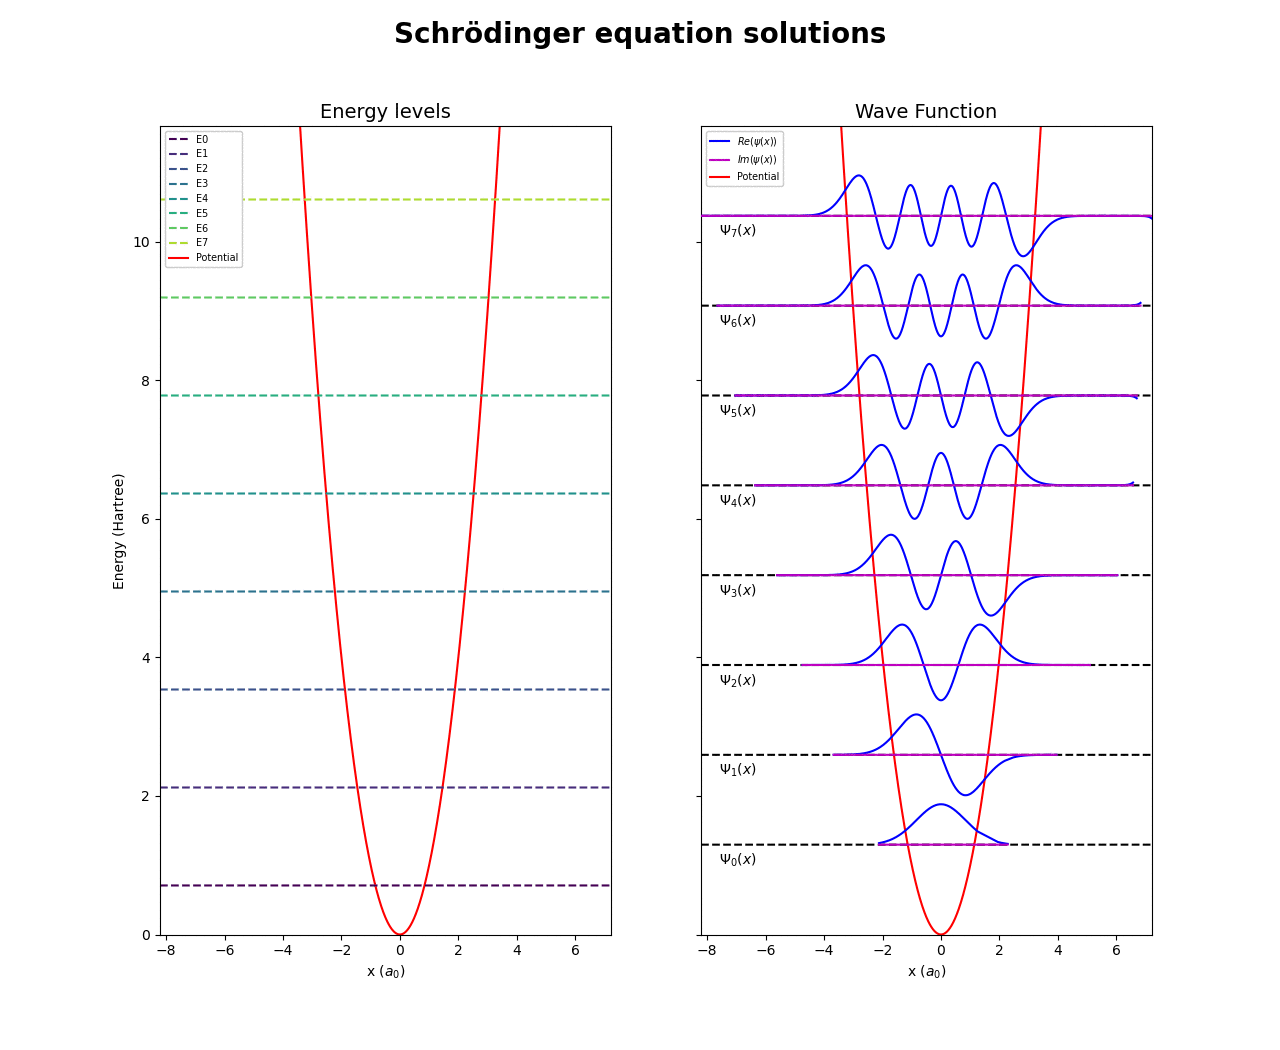

In [ ]:
# Matrix method to solve 1D Harmonic Oscillator schrodinger equation
# units used here m (mas)=1,hbar=1
# Date 15/02/2021
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
def Vpot(x):
    return x**2
a = -5     # float(input('enter lower limit of the domain: '))
b = 5      # float(input('enter upper limit of the domain: '))
N = 2021   # int(input('enter number of grid points: '))
x = np.linspace(a,b,N)
h = x[1]-x[0]
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
# To create hamiltonian matrix
H = -T/(2*h**2) + V
# To find eigenvalues
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:2]
energies=(val[z]/val[z][0])
print(energies)
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions',size=14)
plt.show()


In [ ]:
# Matrix method to solve 1D Harmonic Oscillator schrodinger equation
# units used here m (mas)=1,hbar=1
# Date 15/02/2021
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
@widgets.interact(n=(1,8))
def varibl(n):
    def Vpot(x):
        return x**2
    a = -5     # float(input('enter lower limit of the domain: '))
    b = 5      # float(input('enter upper limit of the domain: '))
    N = 2021   # int(input('enter number of grid points: '))
    x = np.linspace(a,b,N)
    h = x[1]-x[0]
    T = np.zeros((N-2)**2).reshape(N-2,N-2)
    for i in range(N-2):
        for j in range(N-2):
            if i==j:
                T[i,j]= -2
            elif np.abs(i-j)==1:
                T[i,j]=1
            else:
                T[i,j]=0
    V = np.zeros((N-2)**2).reshape(N-2,N-2)
    for i in range(N-2):
        for j in range(N-2):
            if i==j:
                V[i,j]= Vpot(x[i+1])
            else:
                V[i,j]=0
    # To create hamiltonian matrix
    H = -T/(2*h**2) + V
    # To find eigenvalues
    val,vec=np.linalg.eig(H)
    z = np.argsort(val)
    z = z[0:n]
    energies=(val[z]/val[z][0])
    print(energies)
    plt.figure(figsize=(12,10))
    for i in range(len(z)):
        y = []
        y = np.append(y,vec[:,z[i]])
        y = np.append(y,0)
        y = np.insert(y,0,0)
        plt.plot(x,y,lw=3, label="{} ".format(i))
        plt.xlabel('x', size=14)
        plt.ylabel('$\psi$(x)',size=14)
    plt.legend()
    plt.title('normalized wavefunctions',size=14)
    plt.show()


In [ ]:
# Interactive way to investigate harmonic oscillator
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import bisect
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Parametrization m omega/hbar=1
import ipywidgets as widgets
@widgets.interact(n=(1,5))
def varib(n):
    En=(2*n+1)
    def f(u,x,En):
      y,z=u
      f1,f2=z,(x**2-En)*y
      return [f1,f2]
    def shoot(E):
      sol=odeint(f,u,x,args=(En,))
      return sol[:,0][-1]
    # E0=1,E1=3,E2=5 and so on
    # En=(2n+1)
    energies=np.arange(0,10,.2)
    x=np.linspace(-5,5,2021)
    u=[0,.00010]
    Eigen=[shoot(En) for En in energies]
    sol=odeint(f,u,x,args=(1,))
    sol1=odeint(f,u,x,args=(En,))
    #plt.plot(energies,Eigen)
    plt.figure(figsize=(12,6))
    #plt.plot(x,sol[:,1],label='E0=1')
    plt.plot(x,sol1[:,1],label='{}'.format(En))
    plt.legend()
    plt.show()


In [ ]:
# Anharmonic Oscilator
# units used here m (mas)=1,hbar=1
# Date 15/02/2021
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
def Vpot(x):
    return x**2+(1/3)*x**3
a = float(input('enter lower limit of the domain: '))
b = float(input('enter upper limit of the domain: '))
N = int(input('enter number of grid points: '))
x = np.linspace(a,b,N)
h = x[1]-x[0]
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
# To create hamiltonian matrix
H = -T/(2*h**2) + V
# To find eigenvalues
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:4]
energies=(val[z]/val[z][0])
print(energies)
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a anharmonic oscillator',size=14)
plt.show()


In [ ]:
# Hamiltonian matrix method to solve harmonic oscillator 15/02/2021
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
hbar=1
m=1
omega=1
N = 2021
a = 10.0
x = np.linspace(-a/2.,a/2.,N)
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
V = .5*m*omega*x*x
# V[N/2]=2/h   # This would add a "delta" spike in the center.
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
En,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT) 
# The psi now contain the wave functions ordered so that psi[n] if the n-th eigen state.
plt.figure(figsize=(12,6))
plt.plot(x,psi[1],label='$\psi_1(x)$')
plt.plot(x,psi[2],label='$\psi_2(x)$')
plt.xlabel('x')
plt.ylabel('$\psi_n(x)$')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Check the normalization of the wave function arrays.
notok=False
for n in range(len(psi)):
    # s = np.sum(psi[n]*psi[n])
    s = np.linalg.norm(psi[n])  # This does the same as the line above.
    if np.abs(s - 1) > 0.00001: # Check if it is different from one.
        print("Wave function {} is not normalized to 1 but {}".format(n,s))
        notok=True

if not notok:
    print("All the $\psi_n(x)$ are normalized.")

fig2 = plt.figure(figsize=[12,7])
plt.title('Harmonic Oscillator')
plt.ylabel('$\psi(x)$')
plt.xlabel('$x$')
plt.plot([0,0],[-6,V[0]],color="blue")
plt.plot([-a/2.,a/2.],[0,0],color="blue")
plt.plot(x,0.1*V,color="grey",label="V(x) scaled by 0.1")
plt.ylim((-.8,1.))
plt.xlim((-6.,6.))
for i in range(0,5):
    if psi[i][int(N/8)] < 0:
        plt.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:3.1f}".format(i,En[i]))
    else:
        plt.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:3.1f}".format(i,En[i]))

plt.title("Solution to harmonic oscillator")
plt.legend()
plt.savefig("Harmonic_Oscillator_WaveFunctions.pdf")
plt.show()

In [ ]:
fig2 = plt.figure(figsize=[10,7])
plt.title('Harmonic Oscillator and displaced ground state.')
plt.ylabel('$\psi(x)$')
plt.xlabel('$x$')
plt.plot([0,0],[-6,V[0]],color="blue")
plt.plot([-a/2.,a/2.],[0,0],color="blue")
plt.plot(x,0.1*V,color="grey",label="V(x) scaled by 0.1")
plt.ylim((-.1,1.))
plt.xlim((-5.,8.))
a0=5.
alpha = (m*omega/(np.pi*hbar))**0.25
psi0 = np.sqrt(h)*alpha*np.exp(-(x-a0)**2*m*omega/(2*hbar))  # This is the formula for the displaced state.
n0 = np.linalg.norm(psi0)
print("Check the normalization of psi0: ",n0)
plt.plot(x,psi0/np.sqrt(h),label="Displaced state $\Psi(x,0)$")
plt.plot(x,-psi[0]/np.sqrt(h),label="Ground state $\psi_0(x)$")
plt.legend()
plt.savefig("Displaced_state.pdf")
plt.show()

In [ ]:
# cn=np.array([np.sum(psi[i]*psi0) for i in range(N)],dtype='float')
cn = psi.dot(psi0)
print(cn[0:18])
print("Check sum: {:6.4f}".format(np.sum(cn*cn)))
E = np.sum(np.conjugate(cn)*cn*En)
print ("<E> = {:9.4f}".format(E))
E_check = np.sum( np.conjugate(psi0)*H.dot(psi0)) 
print("Check E=",E_check)

In [ ]:
# This version creates an array of zeros, to which it then sequentially adds each of the terms in the sum.
# Note that we use the global psi array.
def psi_xt(t,cn):
    out = np.zeros(N,dtype='complex128')
    for n in range(N): 
        out += cn[n]*psi[n]*np.exp(-1j*(n+0.5)*omega*t)
    return(out)

# This version uses np.sum to accomplish the same thing as the function above.
def psi_xt2(t,cn):
    n = np.arange(len(cn)) 
    times = np.exp(-1j*(n+0.5)*omega*t)
    out = psiT.dot(cn*times)
    return(out)

# This version uses np.sum and now also the previously calculated energyes.
# This way, psi_xt3 will work even if the potential is distorted and the energy levels are no longer (n+0.5)*hbar*omega
def psi_xt3(t,cn):
    out = psiT.dot(cn*np.exp(-1j*En*t/hbar))
    return(out)

In [ ]:
fig2 = plt.figure(figsize=[10,5])
plt.title('Harmonic Oscillator')
plt.ylabel('$\psi(x)$')
plt.xlabel('$x$')
plt.plot([0,0],[-6,V[0]],color="blue")
plt.plot([-a/2.,a/2.+1.],[0,0],color="blue")
plt.plot(x,0.05*V,color="grey",label="V(x) scaled by 0.05")
plt.plot([-a/2.,a/2.],[E*0.05,E*0.05],color="grey",linestyle="dashed",label="<E> scaled by 0.05")
plt.ylim((-.1,0.8))
# plt.plot(x,psi0/np.sqrt(h),color='#dddddd')
for t in [0.,np.pi/4.,np.pi/2.,3.*np.pi/4.,np.pi]: # np.linspace(0,np.pi,8):
    print(t)
    plt.plot(x,np.abs(psi_xt3(t,cn))**2/h,label="t={:5.3}$\pi$".format(t/np.pi))
plt.legend()
plt.savefig("Displaced_state_vs_time.pdf")
plt.show()

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

fig3 = plt.figure(figsize=[12,6])
ax = fig3.add_subplot(111, autoscale_on=False, xlim=(-10, 10), ylim=(-0.1, 1.))
ax.grid()

line, = ax.plot([], [], lw=2,color='red')
time_template = 'time = {:9.2f}s'
time_text = ax.text(0.05, 0.93, '', transform=ax.transAxes)

def init():
    plt.title('Harmonic Oscillator')
    plt.ylabel('$\psi(x)$')
    plt.xlabel('$x$')
    plt.plot([0,0],[-6,V[0]],color="blue")
    plt.plot([-a/2.,a/2.],[0,0],color="blue")
    plt.plot(x,0.05*V,color="grey",label="V(x) scaled by 0.05")
    plt.plot([-a/2.,a/2.],[E*0.05,E*0.05],color="grey",linestyle="dashed",label="<E> scaled by 0.05")
    line.set_data([], [])
    time_text.set_text(time_template.format(0.))
    return line, time_text

def animate(t):
    #t = (float(i)/100.)*(4.*np.pi/omega)
    line.set_data(x,np.abs(psi_xt3(t,cn)/np.sqrt(h)))
    time_text.set_text(time_template.format(t))
    return line,  time_text
frame_rate = 30     # Frame rate in Hz. Make higher for smoother movie, but it takes longer to compute.
time_slowdown = 10  # Run time x times slower than normal. Since omega=1, we want this about 10.
ani = animation.FuncAnimation(fig3, animate, np.linspace(0,2*np.pi/omega,frame_rate*time_slowdown),
                              interval=1000./frame_rate, blit=True, init_func=init)
HTML(ani.to_html5_video())


In [ ]:
frame_rate = 30     # Frame rate in Hz. Make higher for smoother movie, but it takes longer to compute.
time_slowdown = 10  # Run time x times slower than normal. Since omega=1, we want this about 10.
ani = animation.FuncAnimation(fig3, animate, np.linspace(0,2*np.pi/omega,frame_rate*time_slowdown),
                              interval=1000./frame_rate, blit=True, init_func=init)
HTML(ani.to_jshtml())

In [ ]:
# Hamiltonian matrix method to solve anharmonic oscillator 15/02/2021
# 15/02/2021
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
hbar=1
m=1
omega=1
N = 2014
a = 10.0
x = np.linspace(-a/2.,a/2.,N)
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
V = .5*m*omega*x*x+.1*x**4
#V[int(N/2)]=2/h   # This would add a "delta" spike in the center.
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
En,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT) 
# The psi now contain the wave functions ordered so that psi[n] if the n-th eigen state.
plt.figure(figsize=(12,6))
plt.plot(x,psi[1],label='$\psi_1(x)$')
plt.plot(x,psi[2],label='$\psi_2(x)$')
plt.xlabel('x')
plt.ylabel('$\psi_n(x)$')
plt.legend(loc='upper left')
plt.show()

In [ ]:
N=10
(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))

In [ ]:
import matplotlib.pyplot as plt
def simp13dis(h,fx):
  n=len(fx)
  I=0
  for i in range(n):
    if i==0 or i==n:
      I+=fx[i]
    elif i%2!=0:
      I+=4*fx[i]
    else:
      I+=2*fx[i]
    I=I*h/3
  return I
# Normalisation of discrete wavefunction
def norm(psi,dx):
  N=len(psi)
  psi2=[psi[i]**2 for i in range(N)]
  psimod2=simp13dis(dx,psi2)
  normpsi=[psi[i]/psimod2**0.5 for i in range(N)]
  return normpsi
import matplotlib.pyplot as plt
# Solution of Schrodinger equation:
def wavefn(mhdx2,psi,vi,E):
  N=len(psi)
  psiE=[psi[i] for i in range(N)]
  P=[mhdx2*(vi[i]-E) for i in range(N)]

  for i in range(2,N):
    d=1-1/12*P[i]
    a=2*(1+5/12*P[i-1])
    b=-(1-1/12*P[i-2])
    psiE[i]=(a/d)*psiE[i-1]+(b/d)*psiE[i-2]
  return psiE
def NumerovSch(mhdx2,vi,psi0,psi1,psiN,nodes,mxItr):
  N=len(vi)-1
  Emx=max(vi)
  Emn=min(vi)
  psiIn=[0 for i in range(N+1)]
  psiIn[0],psiIn[1],psiIn[N]=psi0,psi1,psiN
  itr=0
  while abs(Emx-Emn)>1e-6 and itr<mxItr:
    E=.5*(Emx+Emn)
    psi=wavefn(mhdx2,psiIn,vi,E)
       
    # Node counting
    cnt=0
    for i in range(1,N-2):
      if psi[i]*psi[i+1]<0:
        cnt+=1
    if cnt>nodes:
      Emx=E
    elif cnt<nodes:
      Emn=E
    else:
      if psi[N-1]>psi[N]:
        Emn=E
      elif psi[N-1]<psi[N]:
        Emx=E
    itr+=1
  if itr<mxItr:
    return E,psi
  else:
    return None,None
def V(k,x):
  return .5*k*x*x
hbar,m=.1,1.0
dx=.01
mxItr=100
psi0,psiN=0,0
k=1
stln=['b','r','m','g','c','y']
x0,xN=[-1.2,-1.4,-1.5,-1.6,-1.7,-1.8],[1.2,1.4,1.5,1.6,1.7,1.8]
psi0,psiN=0,0
plt.figure(1,figsize=(12,6))
for nodes in range(4):
  N=int((xN[nodes]-x0[nodes])/dx)
  dx=(xN[nodes]-x0[nodes])/N
  mhdx2=2*m*dx**2/hbar**2
  x=[x0[nodes]+i*dx for i in range(N+1)]
  Vi=[V(k,x[i]) for i in range(N+1)]
  psi1=(-1)**nodes*1e-4
  E,psi=NumerovSch(mhdx2,Vi,psi0,psi1,psiN,nodes,mxItr)
  if E!=None:
    psi=norm(psi,dx)
    #plt.figure(figsize=(12,6))
    plt.plot(x,psi,stln[nodes],label=r'E=%.4f$\psi_%d(x)$'%(E,nodes))
    #plt.plot(x,Vi,'k--',label='Potential')
xax=[0 for i in range(N+1)] # x-axis
#plt.figure(figsize=(12,6))
plt.plot(x,xax,'k')
plt.plot(x,Vi,'k--',label='Potential')
plt.legend(loc='lower left')
plt.xlabel('x',size=20)
plt.ylabel('$\psi(x)$',size=30)
#plt.figure(figsize=(12,6))
plt.show()

# Hydrogen atom problem
# Radial Wavefunction

In [ ]:
# BETTER CODE TO PLOT THE HYDROGEN RADIAL WAVE FUNCTIONs
# Fulfils orthogonality conditions
# Help taken from internet
import numpy as np
from scipy import constants as const
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
 
hbar = const.hbar
e = const.e
m_e = const.m_e
pi = const.pi
epsilon_0 = const.epsilon_0
joul_to_eV = e
def calculate_potential_term(r):
    potential = e**2 / (4.0 * pi * epsilon_0) / r
    potential_term = sparse.diags((potential))
    return potential_term
 
def calculate_angular_term(r):
    angular = l * (l + 1) / r**2
    angular_term = sparse.diags((angular))
    return angular_term
 
def calculate_laplace_three_point(r):
    h = r[1] - r[0]
     
    main_diag = -2.0 / h**2 * np.ones(N)     
    off_diag  =  1.0 / h**2 * np.ones(N - 1)
    laplace_term = sparse.diags([main_diag, off_diag, off_diag], (0, -1, 1))
    return laplace_term
     
def build_hamiltonian(r):
    laplace_term =   calculate_laplace_three_point(r)
    angular_term =   calculate_angular_term(r)
    potential_term = calculate_potential_term(r)
     
    hamiltonian = -hbar**2 / (2.0 * m_e) * (laplace_term - angular_term) - potential_term
 
    return hamiltonian
N = 2000
l = 0
r = np.linspace(2e-9, 0.0, N, endpoint=False)
hamiltonian = build_hamiltonian(r)
""" solve eigenproblem """
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
 
""" sort eigenvalue and eigenvectors """
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)
 
""" compute probability density for each eigenvector """
densities = [np.absolute(eigenvectors[i, :])**2 for i in range(len(eigenvalues))]

def plot(r, densities, eigenvalues):
    plt.figure(1,figsize=(12,6))
    plt.xlabel('x ($\\mathrm{\AA}$)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
     
    energies = ['E = {: >5.2f} eV'.format(eigenvalues[i].real / e) for i in range(3)]
    plt.plot(r * 1e+10, densities[0], color='blue',  label=energies[0])
    plt.plot(r * 1e+10, densities[1], color='green', label=energies[1])
    plt.plot(r * 1e+10, densities[2], color='red',   label=energies[2])
     
    plt.legend()
    plt.show()
    return
 
""" plot results """
plot(r, densities, eigenvalues)


In [ ]:
# Accuracy check
for j in range(5):
    for i in range(5):
        print("{:16.9e}".format(np.absolute(np.sum(eigenvectors[i, :]*eigenvectors[j, :]))))
    

In [ ]:
# Check normalisation in another way
for j in range(5):
    for i in range(5):
        print("{:16.9e}".format(np.sum(psi[j]*psi[i])))
    

In [ ]:
# Hydrogen Radial wavefunction
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import bisect
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
def f(u,x,E):
  y,z=u
  f1,f2=z,(-2/x+l*(l+1)/x**2-2*E)*y
  return [f1,f2]
def shoot(E):
  sol=odeint(f,u,x,args=(E,))
  return sol[:,0][-1]
l=0
energies=-np.arange(0,20,.2)
x=np.linspace(1e-5,10,2021)
u=[0,.001]
Eigen=[shoot(E) for E in energies]
sol=odeint(f,u,x,args=(-.5,))
sol1=odeint(f,u,x,args=(-.125,))
#plt.plot(energies,Eigen)
plt.figure(figsize=(12,6))
y1=sol[:,1]/np.sum(sol[:,1]*sol[:,1])
y2=sol1[:,1]/np.sum(sol[:,1]*sol[:,1])
#plt.plot(x,abs(sol[:,1]),x,abs(sol1[:,1]))
plt.plot(x,abs(y1),x,abs(y2))


In [ ]:
plt.plot(energies,Eigen)

In [ ]:
Eigen

In [ ]:
from scipy import *
import numpy as np
from scipy import integrate
from scipy import optimize
plt.style.use('fivethirtyeight')

def Schroed_deriv(y,r,l,En):
    "Given y=[u,u'] returns dy/dr=[u',u''] "
    (u,up) = y
    return np.array([up, (l*(l+1)/r**2-2/r-En)*u])
R = np.linspace(1e-5,20,500)
l=2
E0=-1.0

ur = integrate.odeint(Schroed_deriv, [0, 1.0], R, args=(l,E0))
from pylab import *
%matplotlib inline
figure(figsize=(12,6))
fun=ur[:,0]/np.sum(ur[:,1]*ur[:,1])
#plot(R,ur[:,1])
plot(R,fun)
show()

In [ ]:
ur


In [ ]:
R = linspace(1e-10,20,500)
l=0
E0=-1.0
Rb=R[::-1] # invert the mesh

urb = integrate.odeint(Schroed_deriv, [0.0, -1e-5], Rb, args=(l,E0))
ur = urb[:,0][::-1] # we take u(r) and invert it in R.

norm=integrate.simps(ur**2,x=R)
ur *= 1./sqrt(norm)
figure(figsize=(12,6))
plot(R,ur)
grid()
show()


In [ ]:
def SolveSchroedinger(En,l,R):
    Rb=R[::-1]
    du0=-1e-5
    urb=integrate.odeint(Schroed_deriv, [0.0,du0], Rb, args=(l,En))
    ur=urb[:,0][::-1]
    norm=integrate.simps(ur**2,x=R)
    ur *= 1./sqrt(norm)
    return ur
l=2
En=-1./(2**2)  # 2p orbital

l=1
En = -0.25

Ri = linspace(1e-6,20,500)   # linear mesh already fails for this case
ui = SolveSchroedinger(En,l,Ri)


R = logspace(-5,2.,500)
ur = SolveSchroedinger(En,l,R)


#ylim([-0.1,0.1])
plot(R,ur,'o-')
#plot(Ri,ui,'s-')
xlim([0,20])

In [ ]:
def Shoot(En,R,l):
    Rb=R[::-1]
    du0=-1e-5
    ub=integrate.odeint(Schroed_deriv, [0.0,du0], Rb, args=(l,En))
    ur=ub[:,0][::-1]
    norm=integrate.simps(ur**2,x=R)
    ur *= 1./sqrt(norm)
    
    ur = ur/R**l
    
    f0 = ur[0]
    f1 = ur[1]
    f_at_0 = f0 + (f1-f0)*(0.0-R[0])/(R[1]-R[0])
    return f_at_0
R = logspace(-5,2.2,500)
Shoot(-1./2**2,R,1)

In [ ]:
def FindBoundStates(R,l,nmax,Esearch):
    n=0
    Ebnd=[]
    u0 = Shoot(Esearch[0],R,l)
    for i in range(1,len(Esearch)):
        u1 = Shoot(Esearch[i],R,l)
        if u0*u1<0:
            Ebound = optimize.brentq(Shoot,Esearch[i-1],Esearch[i],xtol=1e-16,args=(R,l))
            Ebnd.append((l,Ebound))
            if len(Ebnd)>nmax: break
            n+=1
            print('Found bound state at E=%14.9f E_exact=%14.9f l=%d' % (Ebound, -1.0/(n+l)**2,l))
        u0=u1
    
    return Ebnd
Esearch = -1.2/arange(1,20,0.2)**2

R = logspace(-6,2.2,500)

nmax=7
Bnd=[]
for l in range(nmax-1):
    Bnd += FindBoundStates(R,l,nmax-l,Esearch)

In [ ]:
def cmpE(x,y):
    if abs(x[1]-y[1])>1e-4:
        return cmp(x[1],y[1])
    else:
        return cmp(x[0],y[0])

In [ ]:
# Analytical Hydrogen Radial Wave Functions
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
def R10(r,a):
  r10=2*a**(-1.5)*np.exp(-r/a)
  return r10
def R20(r,a):
  r20=np.sqrt(1/2)*a**(-1.5)*(1-.5*r/a)*np.exp(-.5*r/a)
  return r20
def R21(r,a):
  r21=np.sqrt(1/24)*a**(-1.5)*(r/a)*np.exp(-.5*r/a)
  return r21
a=1
r=np.linspace(1.0e-5,5,100)
plt.figure(1,figsize=(12,6))
plt.title('Radial Hydrogen Wavefunctions')
plt.xlabel('r')
plt.ylabel('$R_{nl}$')
plt.plot(r,abs(R20(a,r)),label='R20')
plt.plot(r,abs(R10(a,r)),label='R10')
plt.plot(r,abs(R21(a,r)),label='R21')
plt.legend()
plt.show

# Spherically symmetric potential


In [ ]:
# Matrix method to solve 1D  infinite well schrodinger equation
# units used here m (mas)=1,hbar=1
# Date 22/02/2021
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
def Vpot(x):
    a=7.5
    e2=1
    return (-e2/x)*(np.exp(-x/a))
a = float(input('enter lower limit of the domain: '))
b = float(input('enter upper limit of the domain: '))
N = int(input('enter number of grid points: '))
x = np.linspace(a,b,N)
h = x[1]-x[0]
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
# To create hamiltonian matrix
H = -T/(2*h**2) + V
# To find eigenvalues
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:2]
energies=(val[z]/val[z][0])
print(energies)
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for spherically symmetric potential',size=14)
plt.show()


In [ ]:

import numpy as np
from matplotlib import pyplot as pl
from matplotlib import animation
from scipy.fftpack import fft,ifft
from IPython.display import HTML


class Schrodinger(object):
    """
    Class which implements a numerical solution of the time-dependent
    Schrodinger equation for an arbitrary potential
    """
    def __init__(self, x, psi_x0, V_x,
                 k0 = None, hbar=1, m=1, t0=0.0):
       
        # Validation of array inputs
        self.x, psi_x0, self.V_x = map(np.asarray, (x, psi_x0, V_x))
        N = self.x.size
        assert self.x.shape == (N,)
        assert psi_x0.shape == (N,)
        assert self.V_x.shape == (N,)

        # Set internal parameters
        self.hbar = hbar
        self.m = m
        self.t = t0
        self.dt_ = None
        self.N = len(x)
        self.dx = self.x[1] - self.x[0]
        self.dk = 2 * np.pi / (self.N * self.dx)

        # set momentum scale
        if k0 == None:
            self.k0 = -0.5 * self.N * self.dk
        else:
            self.k0 = k0
        self.k = self.k0 + self.dk * np.arange(self.N)

        self.psi_x = psi_x0
        self.compute_k_from_x()

        # variables which hold steps in evolution of the
        self.x_evolve_half = None
        self.x_evolve = None
        self.k_evolve = None

        # attributes used for dynamic plotting
        self.psi_x_line = None
        self.psi_k_line = None
        self.V_x_line = None

    def _set_psi_x(self, psi_x):
        self.psi_mod_x = (psi_x * np.exp(-1j * self.k[0] * self.x)
                          * self.dx / np.sqrt(2 * np.pi))

    def _get_psi_x(self):
        return (self.psi_mod_x * np.exp(1j * self.k[0] * self.x)
                * np.sqrt(2 * np.pi) / self.dx)

    def _set_psi_k(self, psi_k):
        self.psi_mod_k = psi_k * np.exp(1j * self.x[0]
                                        * self.dk * np.arange(self.N))

    def _get_psi_k(self):
        return self.psi_mod_k * np.exp(-1j * self.x[0] * 
                                        self.dk * np.arange(self.N))
    
    def _get_dt(self):
        return self.dt_

    def _set_dt(self, dt):
        if dt != self.dt_:
            self.dt_ = dt
            self.x_evolve_half = np.exp(-0.5 * 1j * self.V_x
                                         / self.hbar * dt )
            self.x_evolve = self.x_evolve_half * self.x_evolve_half
            self.k_evolve = np.exp(-0.5 * 1j * self.hbar /
                                    self.m * (self.k * self.k) * dt)
    
    psi_x = property(_get_psi_x, _set_psi_x)
    psi_k = property(_get_psi_k, _set_psi_k)
    dt = property(_get_dt, _set_dt)

    def compute_k_from_x(self):
        self.psi_mod_k = fft(self.psi_mod_x)

    def compute_x_from_k(self):
        self.psi_mod_x = ifft(self.psi_mod_k)

    def time_step(self, dt, Nsteps = 1):
        
        self.dt = dt

        if Nsteps > 0:
            self.psi_mod_x *= self.x_evolve_half

        for i in range(Nsteps - 1):
            self.compute_k_from_x()
            self.psi_mod_k *= self.k_evolve
            self.compute_x_from_k()
            self.psi_mod_x *= self.x_evolve

        self.compute_k_from_x()
        self.psi_mod_k *= self.k_evolve

        self.compute_x_from_k()
        self.psi_mod_x *= self.x_evolve_half

        self.compute_k_from_x()

        self.t += dt * Nsteps


######################################################################
# Helper functions for gaussian wave-packets

def gauss_x(x, a, x0, k0):
    """
    a gaussian wave packet of width a, centered at x0, with momentum k0
    """ 
    return ((a * np.sqrt(np.pi)) ** (-0.5)
            * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

def gauss_k(k,a,x0,k0):
    """
    analytical fourier transform of gauss_x(x), above
    """
    return ((a / np.sqrt(np.pi))**0.5
            * np.exp(-0.5 * (a * (k - k0)) ** 2 - 1j * (k - k0) * x0))


######################################################################
# Utility functions for running the animation

def theta(x):
    """
    theta function :
      returns 0 if x<=0, and 1 if x>0
    """
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y[x > 0] = 1.0
    return y

def square_barrier(x, width, height):
    return height * (theta(x) - theta(x - width))

######################################################################
# Create the animation

# specify time steps and duration
dt = 0.01
N_steps = 50
t_max = 120
frames = int(t_max / float(N_steps * dt))

# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

# specify range in x coordinate
N = 2 ** 11
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)

# specify potential
V0 = 1.5
L = hbar / np.sqrt(2 * m * V0)
a = 3 * L
x0 = -60 * L
V_x = square_barrier(x, a, V0)
V_x[x < -98] = 1E6
V_x[x > 98] = 1E6

# specify initial momentum and quantities derived from it
p0 = np.sqrt(2 * m * 0.2 * V0)
dp2 = p0 * p0 * 1./80
d = hbar / np.sqrt(2 * dp2)

k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x(x, d, x0, k0)

# define the Schrodinger object which performs the calculations
S = Schrodinger(x=x,
                psi_x0=psi_x0,
                V_x=V_x,
                hbar=hbar,
                m=m,
                k0=-28)

######################################################################
# Set up plot
fig = pl.figure()

# plotting limits
xlim = (-100, 100)
klim = (-5, 5)

# top axes show the x-space data
ymin = 0
ymax = V0
ax1 = fig.add_subplot(211, xlim=xlim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_x_line, = ax1.plot([], [], c='r', label=r'$|\psi(x)|$')
V_x_line, = ax1.plot([], [], c='k', label=r'$V(x)$')
center_line = ax1.axvline(0, c='k', ls=':',
                          label = r"$x_0 + v_0t$")

title = ax1.set_title("")
ax1.legend(prop=dict(size=12))
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|$')

# bottom axes show the k-space data
ymin = abs(S.psi_k).min()
ymax = abs(S.psi_k).max()
ax2 = fig.add_subplot(212, xlim=klim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_k_line, = ax2.plot([], [], c='r', label=r'$|\psi(k)|$')

p0_line1 = ax2.axvline(-p0 / hbar, c='k', ls=':', label=r'$\pm p_0$')
p0_line2 = ax2.axvline(p0 / hbar, c='k', ls=':')
mV_line = ax2.axvline(np.sqrt(2 * V0) / hbar, c='k', ls='--',
                      label=r'$\sqrt{2mV_0}$')
ax2.legend(prop=dict(size=12))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'$|\psi(k)|$')

V_x_line.set_data(S.x, S.V_x)

######################################################################
# Animate plot
def init():
    psi_x_line.set_data([], [])
    V_x_line.set_data([], [])
    center_line.set_data([], [])

    psi_k_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, 4 * abs(S.psi_x))
    V_x_line.set_data(S.x, S.V_x)
    center_line.set_data(2 * [x0 + S.t * p0 / m], [0, 1])

    psi_k_line.set_data(S.k, abs(S.psi_k))
    title.set_text("t = %.2f" % S.t)
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=30, blit=True)



anim.save('schrodinger_barrier.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

pl.show()
HTML(anim.to_jshtml())



# ACKNOWLEDGEMENTS:
# 1. Prof. Abhijit KarGupta, Pashkura College
# 2. Book: Physics in Laboratory
# by Dr. Pradipta Kumar Mandal
# 3. Book:  Python Programming 
# by Dr. Abhijit KarGupta
# 4. GOOGLE MASTER !

In [ ]:
# I am indebted to Prof. Abhijit KarGupta for
# all these codes 
# Date 26/02/2021
import numpy as np
from scipy.integrate import odeint
# Defining the derivatives
def f(u, x):
    y, z = u
    f1, f2 = z, - y + 2*z**2/y
    return [f1, f2]
x = np.linspace(-1, 1, 50)
y0 = 1/(np.e + 1/np.e) # Initial value of y
z1, z2 = 0.1, 0.3 # Two initial guess values of z
u = [y0, z1] # Packing with 1st guess value
sol = odeint(f, u, x)
w1 = sol[:, 0][-1] # Value of y at the end point
tol = 0.0001
for i in range(1000): # All trials
    u = [y0, z2] # Packing with 2nd guess value
    sol = odeint(f, u, x)
    w2 = sol[:, 0][-1] # Value of y at the end point
    if abs(w1 - w2) < tol: # Comparison between two attempts
        break
    # Interpolation and upgrade by swap for the next trial
    z1, z2 = z2, z2 + (z2 - z1)/(w2 - w1)*(y0 - w2)
    w1 = w2
# For plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.plot(x, sol[:, 0], 'o')
plt.plot(x, 1/(np.exp(x) + np.exp(-x))) # Exact Solution
plt.show()


In [ ]:
# Python Script: Quantum Harmonic Oscillator in 1D
import numpy as np
from scipy.integrate import odeint, simps
from scipy.optimize import newton
import matplotlib.pyplot as plt
# Function definition for derivatives

def f(u, x, E):
   y, z = u
   f1, f2 = z, (x**2 - 2*E)*y
   return [f1, f2]
# End of the solution for y (wave function) for energy E
def shoot(E):
    sol = odeint(f, u, x, args = (E, ))
    return sol[:, 0][-1]
# Energy range to explore, x-scale and initial values
energies = np.arange(0, 6, 0.1) # Range of energy to scan
x = np.linspace(-5, 5, 100) # x-scale
u = [0, 0.001] # Initial values of y and z
"""
# Locate the eigen energies from plot
hits = [shoot(E) for E in energies]
plt.plot(energies, hits)
plt.axhline()
plt.show()
"""
# Normalized Eigen functions
def psi_normal(En):
    sol = odeint(f, u, x, args = (En, ))
    psi = sol[:, 0]
    N = np.sqrt(simps(psi*psi, x))
    return N*psi
# Plotting of three Eigen functions
plt.figure(figsize=(14,8))
for n in range(3):
    En = newton(shoot, n) # Eigen energy by Newton method
    plt.subplot(1, 3, n+1)
    plt.plot(x, psi_normal(En), lw = 2)
    plt.title('n = {0}'. format(n), size = 18)
    plt.axhline(linestyle = '--')
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import odeint, simps
from scipy.optimize import newton, bisect
from matplotlib import pyplot as plt
def f(w, r, E, l):
    u, v = w
    f1, f2 = v, (l*(l+1)/r**2 - 2/r - E)*u
    return [f1, f2]
r = np.linspace(1e-10, 20, 1000) # Linear Scale
rr = r[::-1] # Reverse the domain for Integration
l = 0 # For s-state
w = [0.0, -0.001] # Boundary value, initial guess value
En = -1/(4) # Energy for 1s state
sol = odeint(f, w, rr, args = (En, l))
psi = sol[:, 0][::-1] # Reverse the solution
norm = simps(psi**2, r)
psi *= 1./np.sqrt(norm) # Normalized solution
plt.plot(r, psi*psi)
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import odeint, simps
from scipy.optimize import newton, bisect
from matplotlib import pyplot as plt
def f(w, r, E, l):
    u, v = w
    f1, f2 = v, (l*(l+1)/r**2 - 2/r - E)*u
    return [f1, f2]
r = np.linspace(1e-10, 20, 1000) # Linear Scale
rr = r[::-1] # Reverse the domain for Integration
l = 0 # For s-state
w = [0.0, -0.001] # Boundary value, initial guess value
En = -1/(4) # Energy for 1s state
sol = odeint(f, w, rr, args = (En, l))
psi = sol[:, 0][::-1] # Reverse the solution
norm = simps(psi**2, r)
psi *= 1./np.sqrt(norm) # Normalized solution
plt.plot(r, psi*psi)
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import odeint, simps
from scipy.optimize import newton, bisect
from matplotlib import pyplot as plt
from ipywidgets import widgets
@widgets.interact(E=(-2.5,0,.1),l=(0,5))
def inter(E,l):
    def f(w, r, E, l):
        u, v = w
        f1, f2 = v, (l*(l+1)/r**2 - 2/r - E)*u
        return [f1, f2]
    r = np.linspace(1e-10, 20, 1000) # Linear Scale
    rr = r[::-1] # Reverse the domain for Integration
    l = 0 # For s-state
    w = [0.0, -0.001] # Boundary value, initial guess value
    #E = -1/(4) # Energy for 1s state
    sol = odeint(f, w, rr, args = (E, l))
    psi = sol[:, 0][::-1] # Reverse the solution
    norm = simps(psi**2, r)
    psi *= 1./np.sqrt(norm) # Normalized solution
    plt.figure(figsize=(12,6))
    plt.plot(r, psi*psi)
    plt.show()

In [ ]:
r = np.logspace(-6, 2, 1000) # Domain in log scale
rr = r[::-1] # Reverse the r-scale
energies = -1.2/np.arange(1, 20, 0.2)**2 # Energy scale
n = energies.size
l = 0      # For s-waves
def shoot(E):
    sol = odeint(f, w, rr, args = (E,l))
    return sol[:, 0][-1]
u0 = shoot(energies[0]) # Shoot at the first energy value
print('Eigen energies')
En0 = 0 # This is dummy, for comparison
for i in range(1, n):
    u1 = shoot(energies[i])
    if u1*u0 < 0:
       En = bisect(shoot, energies[i-1], energies[i])
    u0 = u1
    if En0 != En: print(En, end = '\n ')
    En0 = En

In [ ]:
energies

In [ ]:
a=[1,2,3,4,5,6]
a[::-1][-1]

In [ ]:
r = np.logspace(-4, 2, 1000) # Domain in log scale
r